In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#np.set_printoptions(threshold=sys.maxsize)

2022-12-23 15:51:12.124647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-23 15:51:12.213036: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-23 15:51:12.234572: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-23 15:51:12.627465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'edge_detection_with_prior'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
DataProcessing = dataset.DataProcessing(config_path=config_path)
Model = model.Model(config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

2022-12-23 15:51:13.728154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 15:51:13.731476: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 15:51:13.731572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 15:51:13.732228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Load Dataset, Preprocess Images and Dataset

The TRAIN DS contains 868 images.
The TEST DS contains 73 images.
The IMG_ONLY DS contains 20 images.


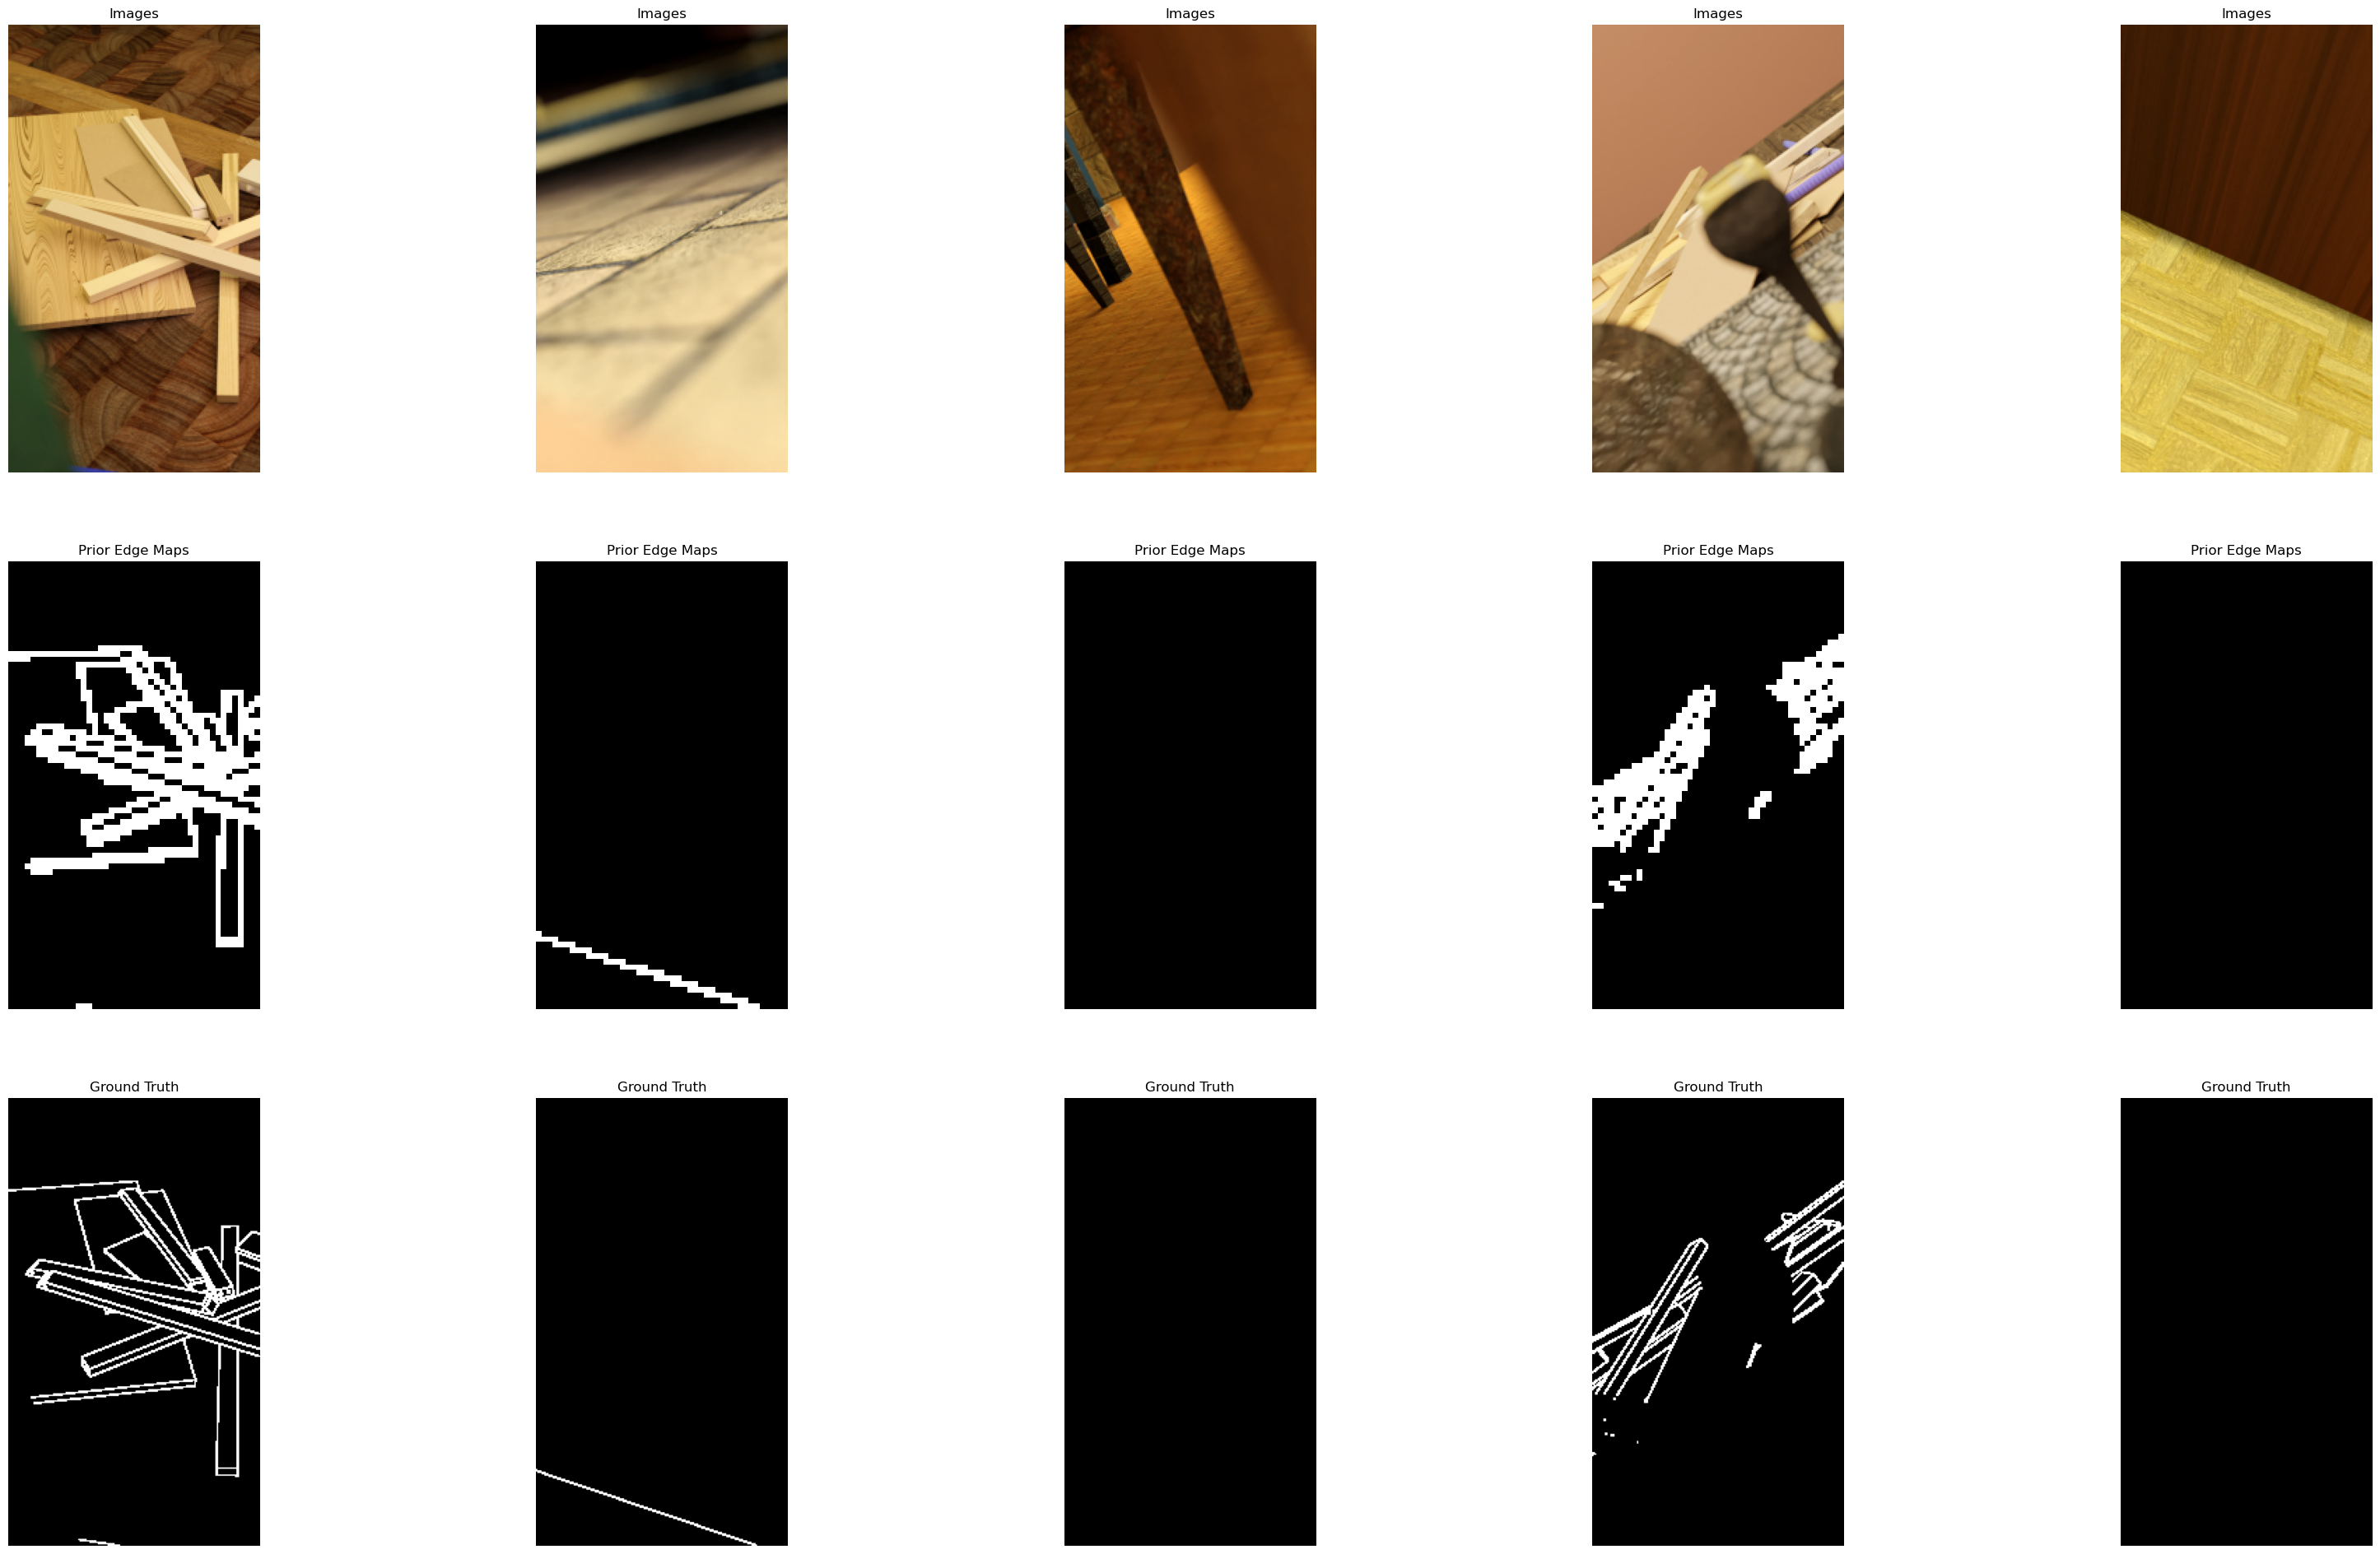

In [3]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

img_only_ds, img_count_img_only_ds = DataProcessing.load_dataset(DataProcessing.key.img_only)

if Model.train_model:
    for inp, out in train_ds.take(1):
        edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                                        prior = inp['in_edge'],
                                        batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'])

# Define, Compile and Train Model

In [4]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.input_data_cfg, DataProcessing.output_data_cfg)
    # model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(),
                  metrics=Model.get_metrics(DataProcessing.output_data_cfg["edge"]["num_classes"]))

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=train_ds,
                        callbacks=Model.get_callbacks(), verbose=1)

model = Model.get_best_model_from_checkpoints()

Epoch 1/50


2022-12-23 15:51:23.548057: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-12-23 15:51:23.991207: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


174/174 [==============================] - 16s 68ms/step - loss: 3451.8250 - out_edge_loss: 3451.8250 - accuracy: 0.8629 - accuracy_1: 0.8629 - f1: 0.3439 - precision: 0.2739 - recall: 0.5087 - f1_1: 0.3439 - precision_1: 0.2739 - recall_1: 0.5087 - val_loss: 3288.7537 - val_out_edge_loss: 3288.7537 - val_accuracy: 0.9441 - val_accuracy_1: 0.9441 - val_f1: 0.1380 - val_precision: 0.9125 - val_recall: 0.0747 - val_f1_1: 0.1380 - val_precision_1: 0.9125 - val_recall_1: 0.0747
Epoch 2/50
174/174 [==============================] - 11s 66ms/step - loss: 1898.8130 - out_edge_loss: 1898.8130 - accuracy: 0.9600 - accuracy_1: 0.9600 - f1: 0.6671 - precision: 0.6719 - recall: 0.6644 - f1_1: 0.6671 - precision_1: 0.6719 - recall_1: 0.6644 - val_loss: 2714.7578 - val_out_edge_loss: 2714.7578 - val_accuracy: 0.9189 - val_accuracy_1: 0.9189 - val_f1: 0.5591 - val_precision: 0.4148 - val_recall: 0.8574 - val_f1_1: 0.5591 - val_precision_1: 0.4148 - val_recall_1: 0.8574
Epoch 3/50
174/174 [===========

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=1378.88-epoch=10.00-f1=0.7654/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=1378.88-epoch=10.00-f1=0.7654/assets


174/174 [==============================] - 17s 97ms/step - loss: 1319.1860 - out_edge_loss: 1319.1860 - accuracy: 0.9730 - accuracy_1: 0.9730 - f1: 0.7756 - precision: 0.7567 - recall: 0.7956 - f1_1: 0.7756 - precision_1: 0.7567 - recall_1: 0.7956 - val_loss: 1378.8752 - val_out_edge_loss: 1378.8752 - val_accuracy: 0.9691 - val_accuracy_1: 0.9691 - val_f1: 0.7654 - val_precision: 0.7034 - val_recall: 0.8394 - val_f1_1: 0.7654 - val_precision_1: 0.7034 - val_recall_1: 0.8394
Epoch 11/50
174/174 [==============================] - 12s 67ms/step - loss: 1311.9957 - out_edge_loss: 1311.9957 - accuracy: 0.9727 - accuracy_1: 0.9727 - f1: 0.7768 - precision: 0.7556 - recall: 0.7992 - f1_1: 0.7768 - precision_1: 0.7556 - recall_1: 0.7992 - val_loss: 1346.5986 - val_out_edge_loss: 1346.5986 - val_accuracy: 0.9702 - val_accuracy_1: 0.9702 - val_f1: 0.7706 - val_precision: 0.7165 - val_recall: 0.8337 - val_f1_1: 0.7706 - val_precision_1: 0.7165 - val_recall_1: 0.8337
Epoch 12/50
174/174 [=========

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=1234.45-epoch=20.00-f1=0.7963/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=1234.45-epoch=20.00-f1=0.7963/assets


174/174 [==============================] - 16s 95ms/step - loss: 1190.8043 - out_edge_loss: 1190.8043 - accuracy: 0.9766 - accuracy_1: 0.9766 - f1: 0.8019 - precision: 0.7795 - recall: 0.8257 - f1_1: 0.8019 - precision_1: 0.7795 - recall_1: 0.8257 - val_loss: 1234.4474 - val_out_edge_loss: 1234.4474 - val_accuracy: 0.9760 - val_accuracy_1: 0.9760 - val_f1: 0.7963 - val_precision: 0.8125 - val_recall: 0.7807 - val_f1_1: 0.7963 - val_precision_1: 0.8125 - val_recall_1: 0.7807
Epoch 21/50
174/174 [==============================] - 12s 67ms/step - loss: 1194.3221 - out_edge_loss: 1194.3221 - accuracy: 0.9747 - accuracy_1: 0.9747 - f1: 0.8029 - precision: 0.7826 - recall: 0.8243 - f1_1: 0.8029 - precision_1: 0.7826 - recall_1: 0.8243 - val_loss: 1235.8074 - val_out_edge_loss: 1235.8074 - val_accuracy: 0.9768 - val_accuracy_1: 0.9768 - val_f1: 0.7985 - val_precision: 0.8319 - val_recall: 0.7678 - val_f1_1: 0.7985 - val_precision_1: 0.8319 - val_recall_1: 0.7678
Epoch 22/50
174/174 [=========

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=1201.75-epoch=30.00-f1=0.8022/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=1201.75-epoch=30.00-f1=0.8022/assets


174/174 [==============================] - 17s 95ms/step - loss: 1115.8931 - out_edge_loss: 1115.8931 - accuracy: 0.9768 - accuracy_1: 0.9768 - f1: 0.8035 - precision: 0.7774 - recall: 0.8321 - f1_1: 0.8035 - precision_1: 0.7774 - recall_1: 0.8321 - val_loss: 1201.7493 - val_out_edge_loss: 1201.7493 - val_accuracy: 0.9768 - val_accuracy_1: 0.9768 - val_f1: 0.8022 - val_precision: 0.8223 - val_recall: 0.7831 - val_f1_1: 0.8022 - val_precision_1: 0.8223 - val_recall_1: 0.7831
Epoch 31/50
174/174 [==============================] - 11s 65ms/step - loss: 1116.7577 - out_edge_loss: 1116.7577 - accuracy: 0.9768 - accuracy_1: 0.9768 - f1: 0.8081 - precision: 0.7873 - recall: 0.8300 - f1_1: 0.8081 - precision_1: 0.7873 - recall_1: 0.8300 - val_loss: 1212.6729 - val_out_edge_loss: 1212.6729 - val_accuracy: 0.9781 - val_accuracy_1: 0.9781 - val_f1: 0.8045 - val_precision: 0.8683 - val_recall: 0.7495 - val_f1_1: 0.8045 - val_precision_1: 0.8683 - val_recall_1: 0.7495
Epoch 32/50
174/174 [=========

KeyboardInterrupt: 

In [5]:
model.summary()


tf.keras.utils.plot_model(
    model,
    to_file=Model.Data.paths['FIGURES']+"/model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_img (InputLayer)            [(None, 320, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 320, 180, 8)  224         ['in_img[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 320, 180, 8)  32         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

                                                                                                  
 batch_normalization_10 (BatchN  (None, 80, 45, 6)   24          ['separable_conv2d[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv2d_9 (Conv2D)              (None, 80, 45, 6)    222         ['batch_normalization_14[0][0]'] 
                                                                                                  
 separable_conv2d_1 (SeparableC  (None, 80, 45, 6)   96          ['batch_normalization_10[0][0]'] 
 onv2D)                                                                                           
                                                                                                  
 batch_normalization_15 (BatchN  (None, 80, 45, 6)   24          ['conv2d_9[0][0]']               
 ormalizat

 ormalization)                  )                                                                 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 320, 180, 12  228         ['batch_normalization_25[0][0]'] 
                                )                                                                 
                                                                                                  
 batch_normalization_26 (BatchN  (None, 320, 180, 12  48         ['conv2d_12[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 separable_conv2d_11 (Separable  (None, 320, 180, 12  264        ['batch_normalization_26[0][0]'] 
 Conv2D)                        )                                                                 
          

# Plot Results

In [6]:
if Model.train_model:
    plot_losses = ["loss", "loss"]
    plot_metrics = ["accuracy", "f1", "recall", "precision"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training")

    plots.plot_training_history(history=history.history, list_of_loss_names=plot_losses,
                                list_of_metric_names=plot_metrics,
                                save=Model.cfg["SAVE"], path=path)

NameError: name 'history' is not defined

1/1 [==============================] - 0s 29ms/step


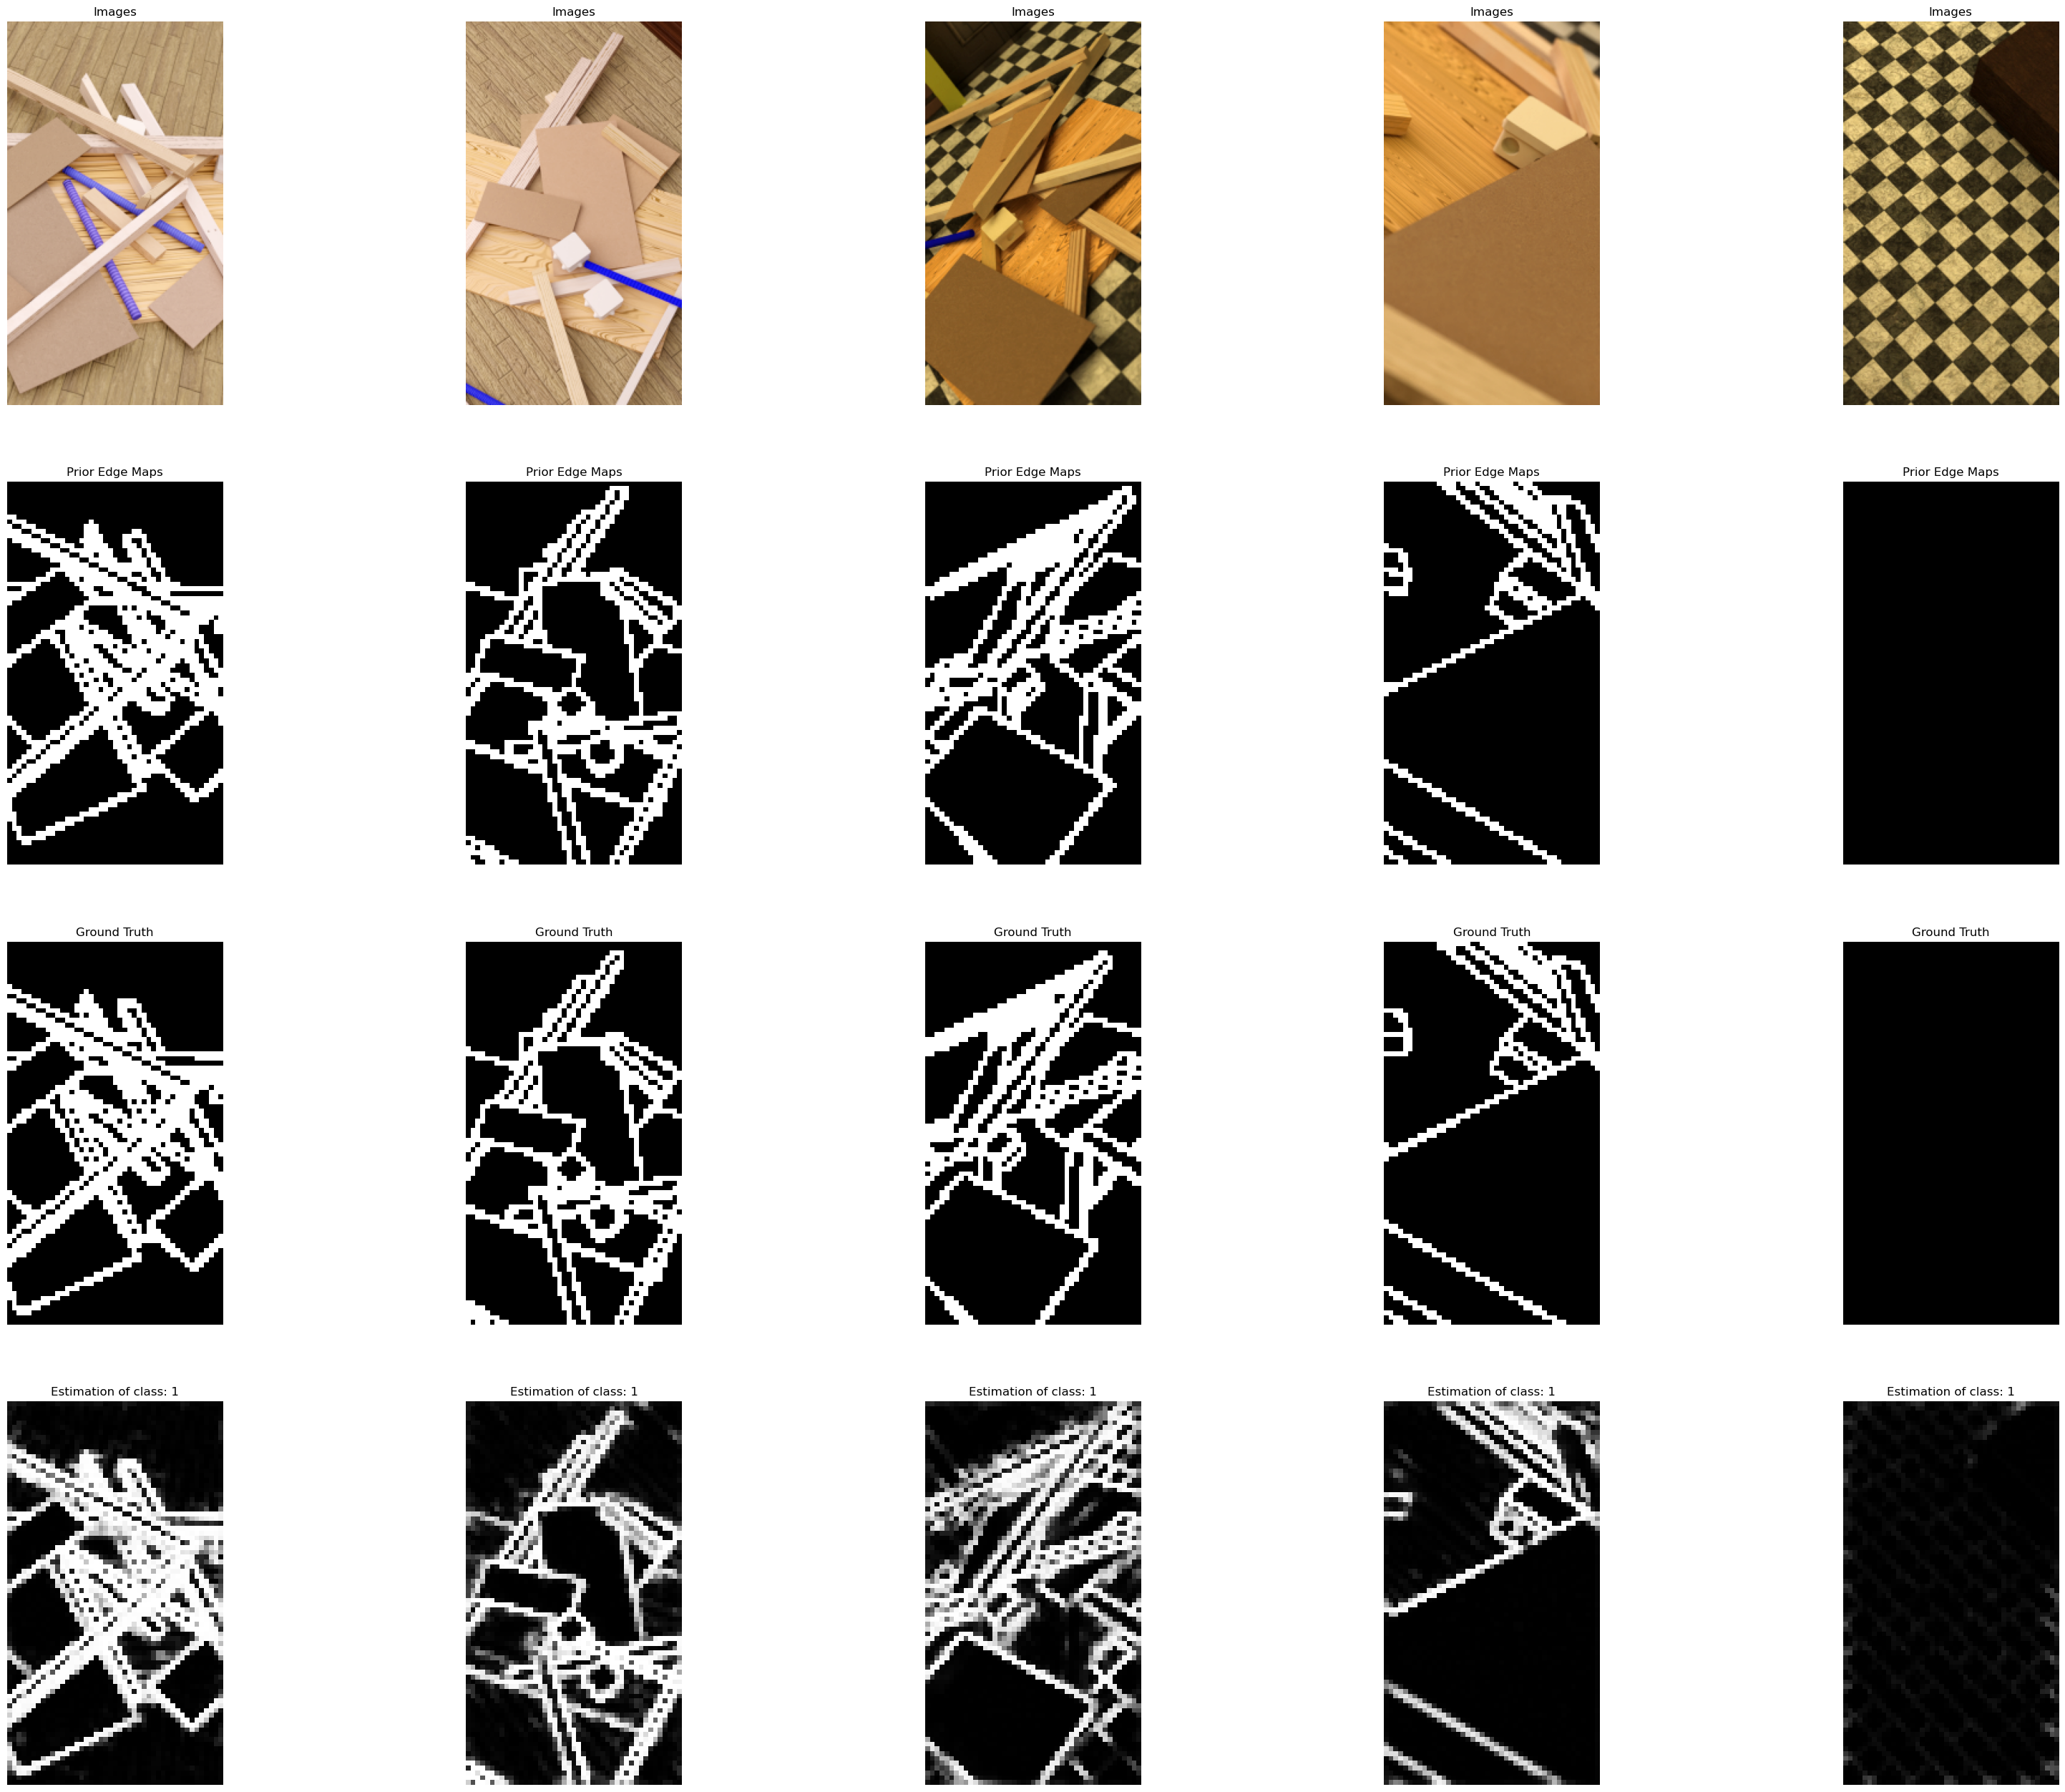

1/1 [==============================] - 0s 20ms/step


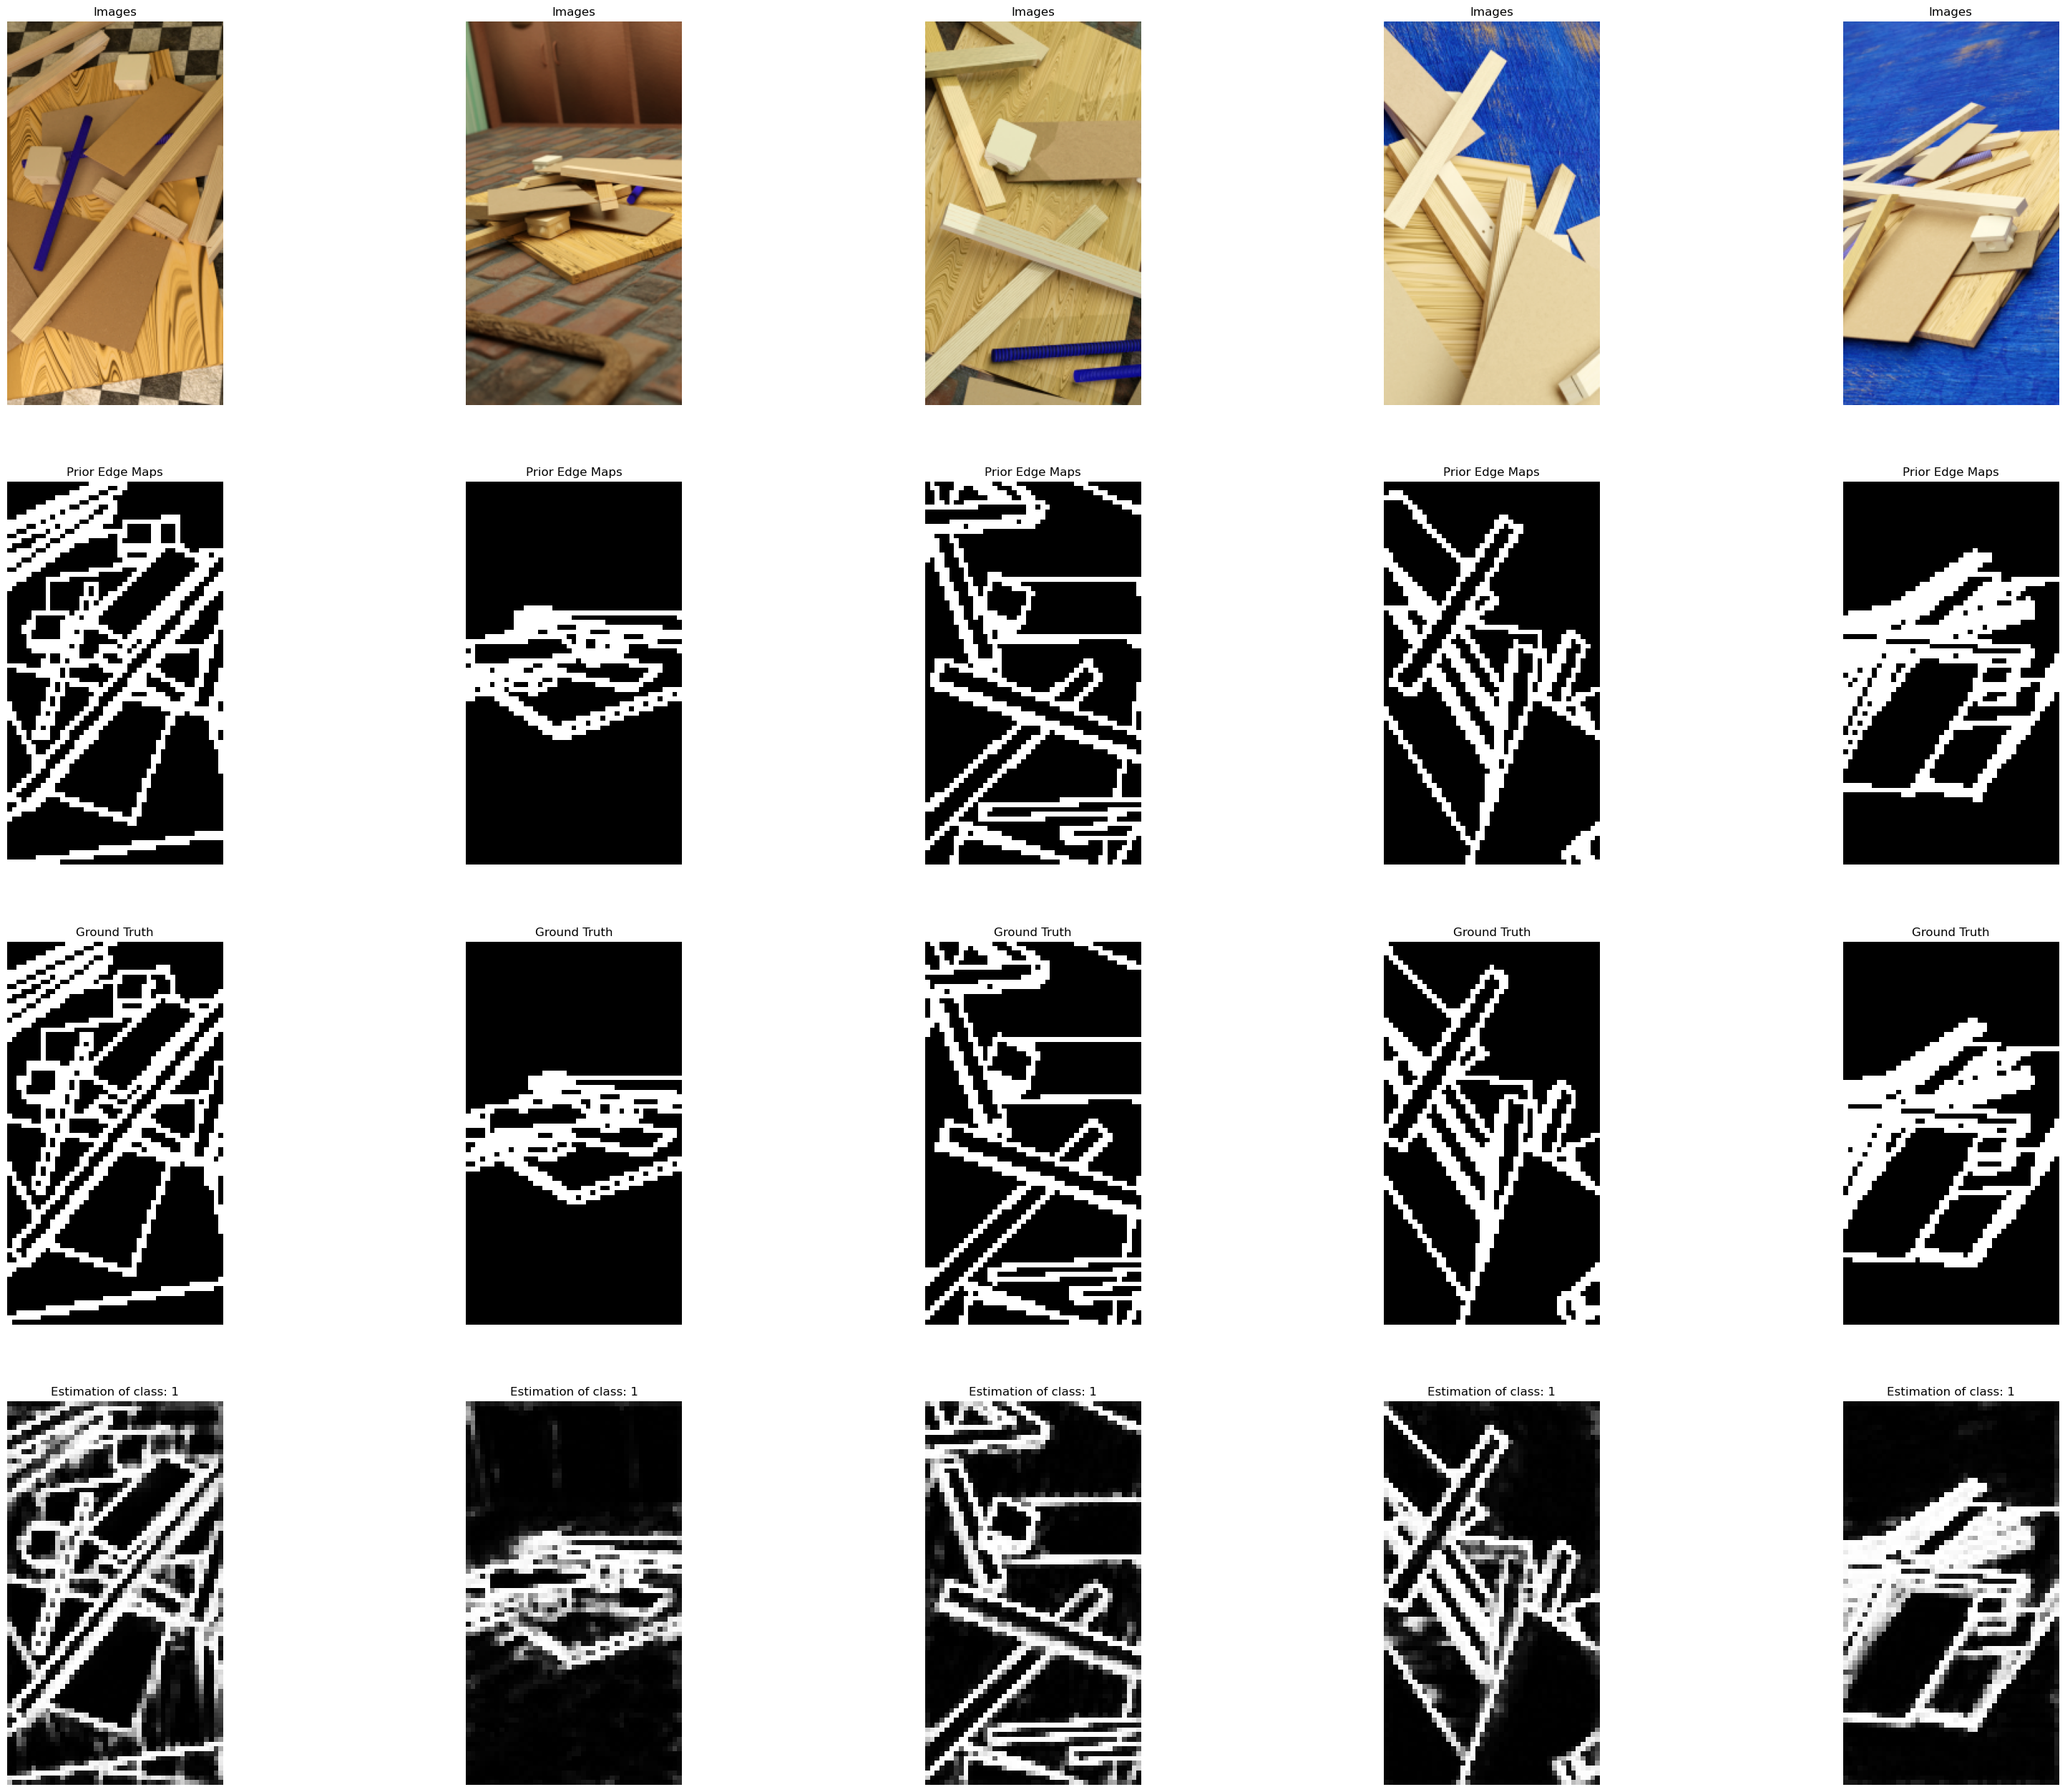

1/1 [==============================] - 0s 25ms/step


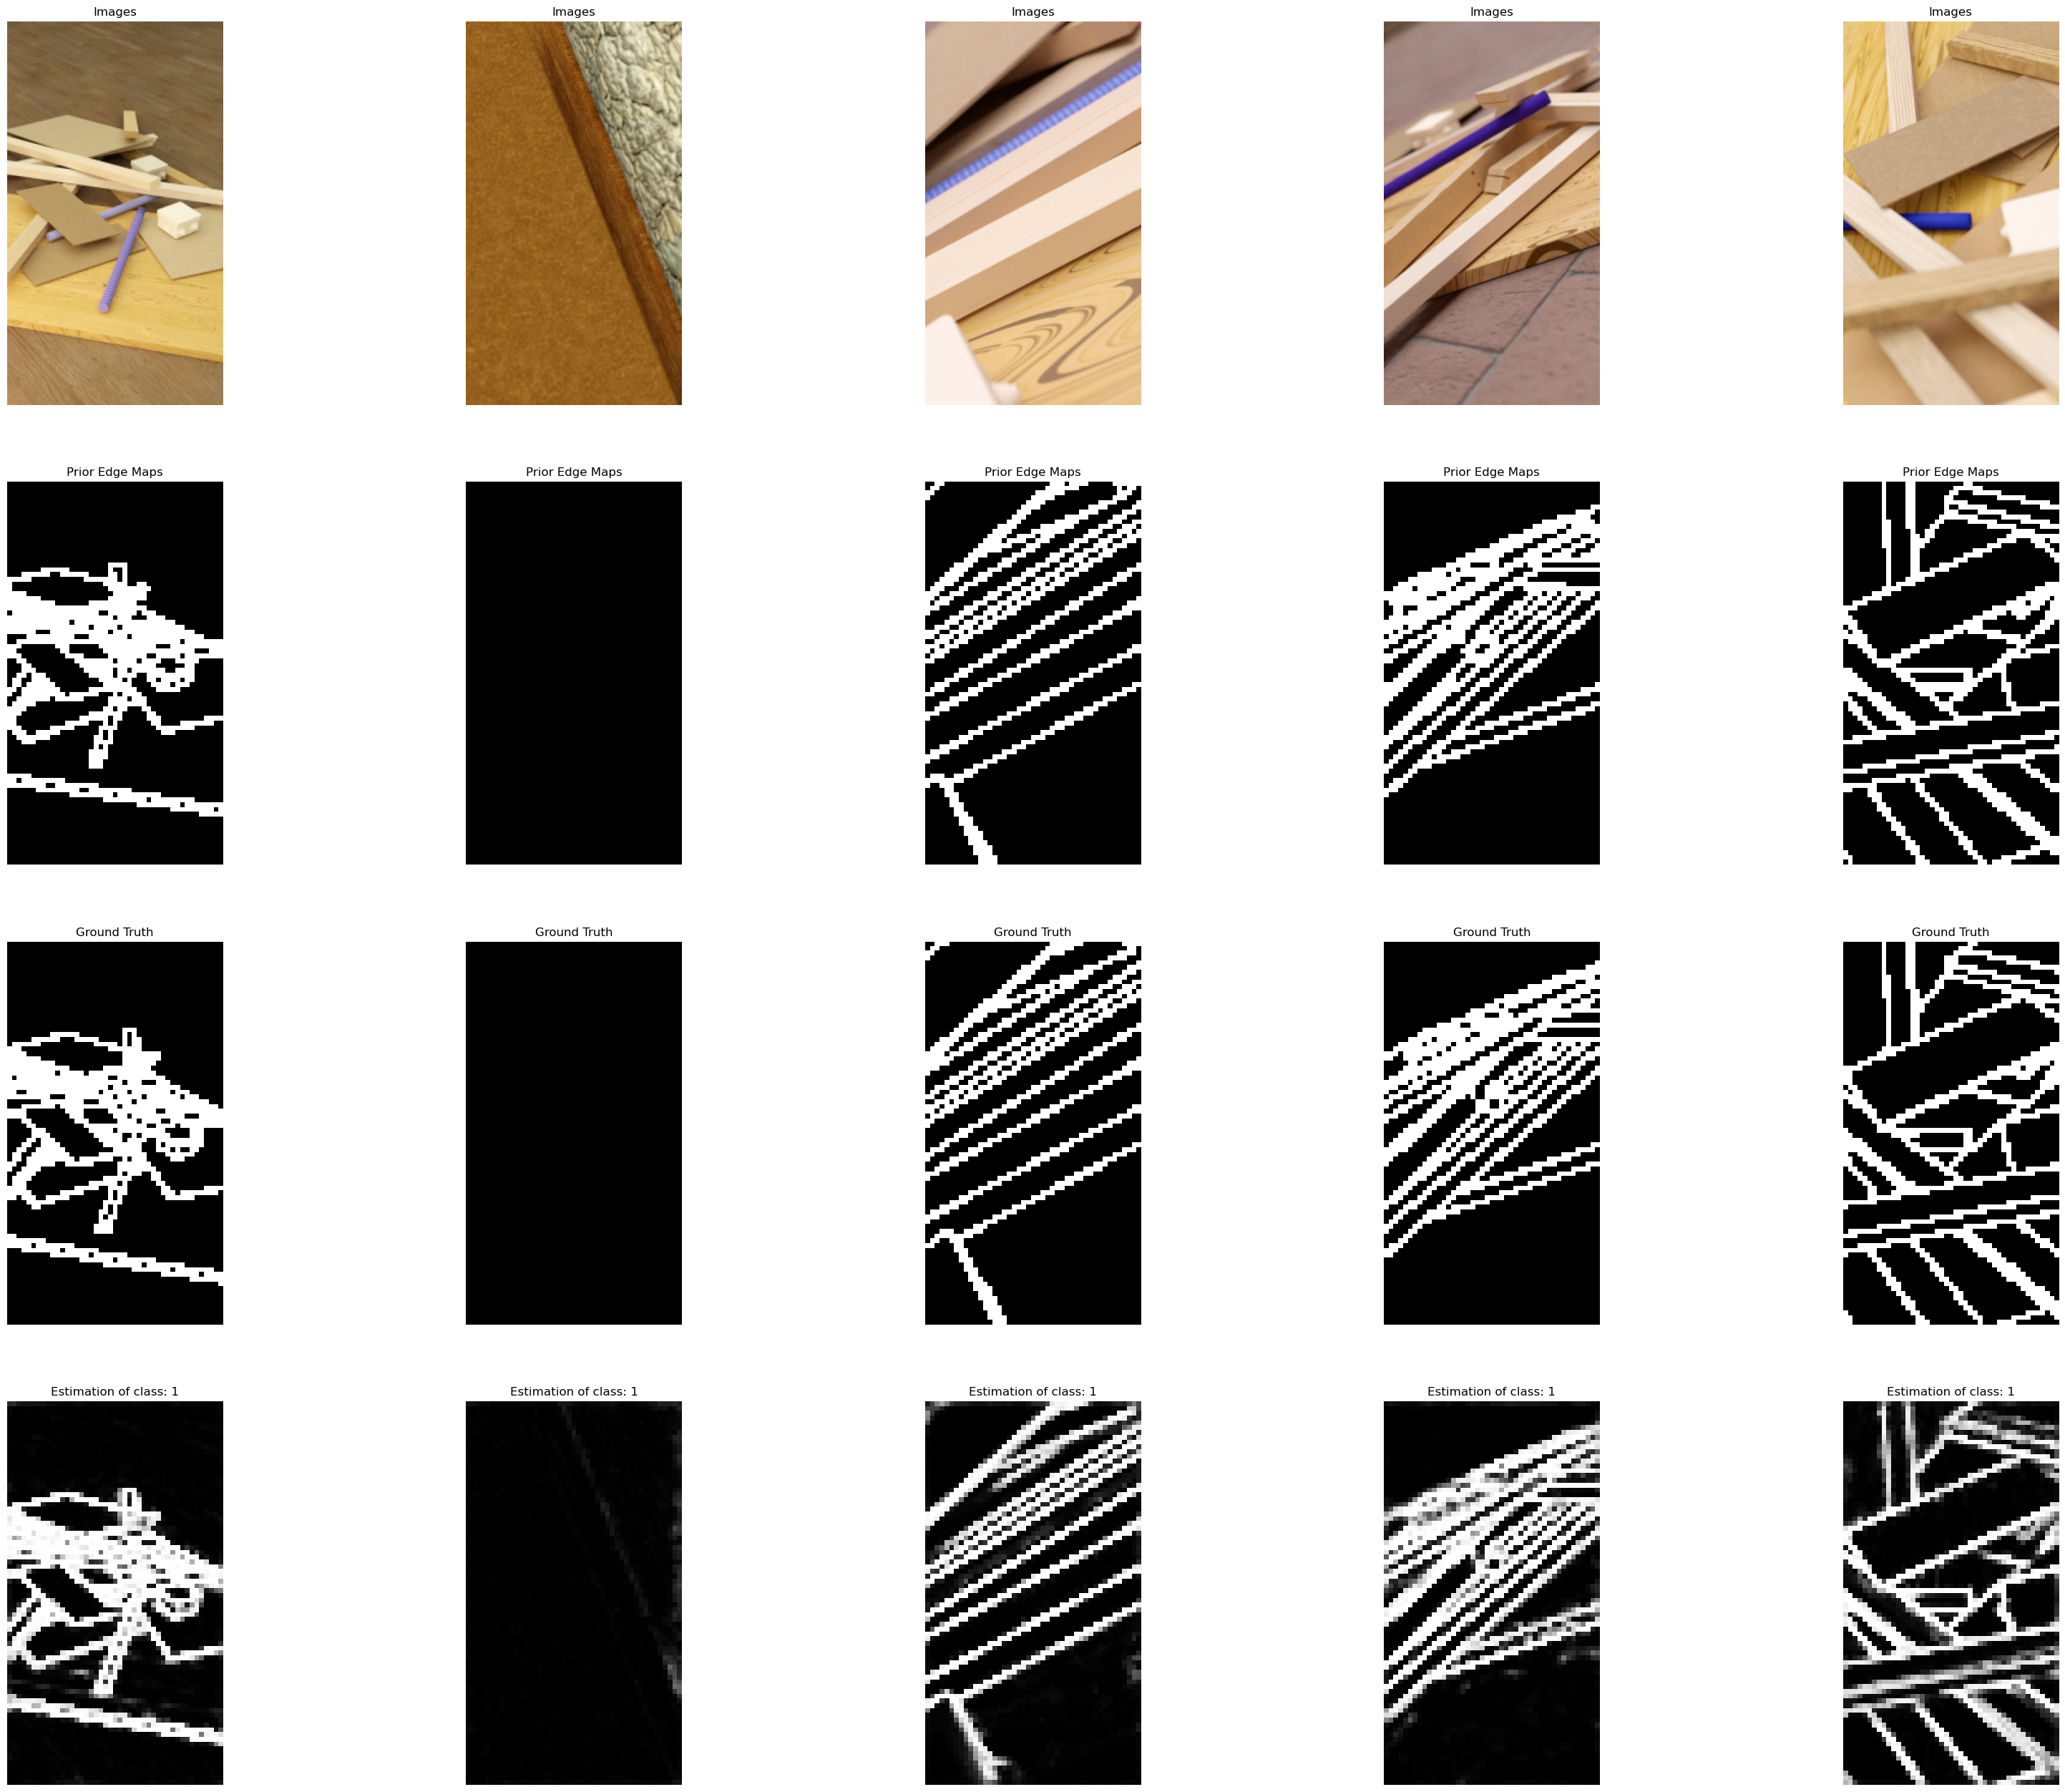

2022-12-23 15:32:38.989449: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [8]:
i = 0
for inp, out in test_ds.take(3):
    pred = model.predict(inp)
    path = os.path.join(Model.Data.paths["FIGURES"], "prediction_{}".format(i))
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior = inp['in_edge'],
                                    labels=out['out_edge'],
                                    predictions=pred[0],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'])
    i += 1

In [ ]:
k = 0
output = 1 # pyramid_out
num = 6
batch = 5
for inp, out in test_ds.take(2):
    plt.figure(figsize=(5,10))
    pred = model.predict(inp)
    out_pred = pred[output]
    for i in range(batch):
        plt.subplot(num+1, batch, i + 1)
        plt.imshow((out["out_edge"][i,:,:,0]))
        for j in range(num):
            plt.subplot(num+1, batch, batch*(1+j) + i + 1)
            plt.imshow(out_pred[i,:,:,j], cmap='gray', vmin=-1, vmax=1)
    path = os.path.join(Model.Data.paths["FIGURES"], "pyramid_out_{}".format(k))
    plt.savefig(path + ".svg", bbox_inches='tight')
    plt.show()
    k = k+1

In [ ]:
k = 0
output = 2 # edge_layer
num = 6
batch = 5
for inp, out in test_ds.take(2):
    plt.figure(figsize=(5,10))
    pred = model.predict(inp)
    out_pred = pred[output]
    for i in range(batch):
        plt.subplot(num+1, batch, i + 1)
        plt.imshow((out["out_edge"][i,:,:,0]))
        for j in range(num):
            plt.subplot(num+1, batch, batch*(1+j) + i + 1)
            plt.imshow(out_pred[i,:,:,j], cmap='gray', vmin=0, vmax=1)
    path = os.path.join(Model.Data.paths["FIGURES"], "side_1_{}".format(k))
    plt.savefig(path + ".svg", bbox_inches='tight')
    plt.show()
    k += 1

In [ ]:
k = 0
output = 5 # image_pyramid_in
num = 6
batch = 5
for inp, out in test_ds.take(2):
    plt.figure(figsize=(5,10))
    pred = model.predict(inp)
    out_pred = pred[output]
    for i in range(batch):
        plt.subplot(num+1, batch, i + 1)
        plt.imshow((out["out_edge"][i,:,:,0]))
        for j in range(num):
            plt.subplot(num+1, batch, batch*(1+j) + i + 1)
            plt.imshow(out_pred[i,:,:,j], cmap='gray', vmin=0, vmax=1)
    path = os.path.join(Model.Data.paths["FIGURES"], "side_2_{}".format(k))
    plt.savefig(path + ".svg", bbox_inches='tight')
    plt.show()
    k += 1

In [ ]:
### Maximum F1 Score:
path_metrics_evaluation_plot = os.path.join(Model.Data.paths["FIGURES"],
                                            "threshold_metrics_evaluation_test_ds.svg")

edge_detection_plots.plot_threshold_metrics_evaluation(model=model, ds=test_ds,
                                                       num_classes=DataProcessing
                                                       .output_data_cfg["edge"]["num_classes"],
                                                       classes_displayed_individually=True,
                                                       save=Model.cfg["SAVE"],
                                                       path=path_metrics_evaluation_plot,
                                                       accuracy_y_lim_min=0.8)


In [ ]:
if Model.cfg["CONVERT_TO_TFLITE"]:
    Model.convert_model_to_tflite(model)